# Weighted non-linear fitting

This notebook outlines how Python code can be used to perform the weighted non-linear fitting approach.
The approach used here is general to any non-linear function, but we will use the example of a first order integrated rate law that appears in the main text of the paper. 

The first step is to import the necessary Python modules and functions that we will be using. 

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

The next step is to define the non-linear funtion that we will fit, below we define the first-order integrated rate equation. 

In [1]:
def first_order(t: np.ndarray, k: float, A0: float) -> np.ndarray:
    """
    The first order integrated rate equation.

    Args:
        t (:py:attr:`array_like`): The time data.
        k (:py:attr:`float`): The rate constant value.
        A0 (:py:attr:`float`): The initial reactant concentration value.

    :return: The concentration at time t.
    """
    return A0 * np.exp(-1 * k  * t)

The cell below defines the data that we are hoping to model, which as been taken from Monk and Munro [[1]](#References). 
This is time and concentration data, with a constant uncertainty in concentration. 

In [2]:
t = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
At = np.array([6.23, 4.84, 3.76, 3.20, 2.60, 2.16, 1.85, 1.49, 1.27, 1.01])
At_err = np.ones_like(At) * 0.3

We can then use the `curve_fit` function to estimate the best fit parameters for the non-linear equation. 
The `sigma` keyword argument lets us include uncertainty weighting. 

In [3]:
popt, pcov = curve_fit(first_order, t, At, sigma=At_err)
perr = np.diag(np.sqrt(pcov))

/var/folders/b2/d1yfnqn51dj0lwhm3mjhgchr0000gq/T/ipykernel_97682/83617017.py:17: RuntimeWarning: overflow encountered in exp
  return A0 * np.exp(-1 * k  * t)


We then print the results below and plot the data, both as a linear and non-linear plot.

In [22]:
print(f'k = {popt[0]:.3f} +/ {perr[0]:.3f} s^{-1}')
print(f'A0 = {popt[1]:.2f} +/ {perr[1]:.2f} mol m^{-3}')

k = 0.103 +/ 0.003 s^-1
A0 = 7.42 +/ 0.16 mol/m^-3


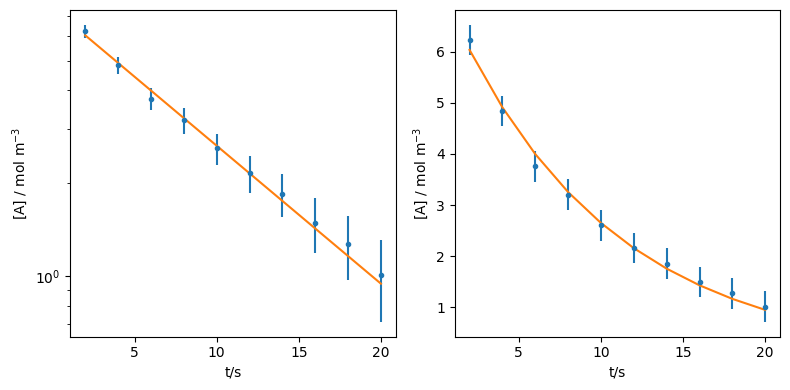

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].errorbar(t, At, At_err, marker='.', ls='')
ax[0].plot(t, first_order(t, *popt), '-')
ax[0].set_yscale('log')
ax[0].set_xlabel('t/s')
ax[0].set_ylabel('$[\mathrm{A}]$ / mol m$^{-3}$')
ax[1].errorbar(t, At, At_err, marker='.', ls='')
ax[1].plot(t, first_order(t, *popt), '-')
ax[1].set_xlabel('t/s')
ax[1].set_ylabel('$[\mathrm{A}]$ / mol m$^{-3}$')
plt.tight_layout()
plt.show()

# References

1. Monk, P.; Munro, L. J. *Maths for Chemistry: A chemist’s toolkit of calculations*, 2nd ed.; Oxford University Press: London, UK, 2010.